# WeatherPy

---

##  Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = [] 

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
#set the units to metric 
units = "metric"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | ingeniero jacobacci
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | salinopolis
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | puerto baquerizo moreno
Processing Record 14 of Set 1 | bungu
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | buurhakaba
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 

Processing Record 39 of Set 4 | achacachi
Processing Record 40 of Set 4 | upington
Processing Record 41 of Set 4 | rabkavi
Processing Record 42 of Set 4 | vorkuta
Processing Record 43 of Set 4 | weno
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | kharovsk
Processing Record 47 of Set 4 | moroni
Processing Record 48 of Set 4 | at taraf
Processing Record 49 of Set 4 | conde
Processing Record 0 of Set 5 | kingston
Processing Record 1 of Set 5 | bandar abbas
Processing Record 2 of Set 5 | atafu village
Processing Record 3 of Set 5 | tukrah
Processing Record 4 of Set 5 | garoowe
Processing Record 5 of Set 5 | zaragoza
Processing Record 6 of Set 5 | kargasok
Processing Record 7 of Set 5 | harper
Processing Record 8 of Set 5 | adrar
Processing Record 9 of Set 5 | eirunepe
Processing Record 10 of Set 5 | nemuro
Processing Record 11 of Set 5 | anar darah
Processing Record 12 of Set 5 | xining
Processing Record 13 of Set 5 | hengc

Processing Record 32 of Set 8 | hasaki
Processing Record 33 of Set 8 | cill airne
Processing Record 34 of Set 8 | bilisht
Processing Record 35 of Set 8 | flin flon
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | kaa-khem
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | lodja
Processing Record 40 of Set 8 | ebon
Processing Record 41 of Set 8 | juneau
Processing Record 42 of Set 8 | hailun
Processing Record 43 of Set 8 | boditi
Processing Record 44 of Set 8 | jeddah
Processing Record 45 of Set 8 | nikol'sk
Processing Record 46 of Set 8 | castro
Processing Record 47 of Set 8 | ath thawrah
Processing Record 48 of Set 8 | yeppoon
Processing Record 49 of Set 8 | kittila
Processing Record 0 of Set 9 | takaungu
Processing Record 1 of Set 9 | askoy
Processing Record 2 of Set 9 | alotau
City not found. Skipping...
Processing Record 3 of Set 9 | coquimbo
Processing Record 4 of Set 9 | yingkou
Processing Record 5 of Set 9 | sarmiento
Processi

Processing Record 23 of Set 12 | page
Processing Record 24 of Set 12 | vorgashor
Processing Record 25 of Set 12 | kalmunai
Processing Record 26 of Set 12 | pacocha
Processing Record 27 of Set 12 | praia
Processing Record 28 of Set 12 | talamba
Processing Record 29 of Set 12 | al jubayl
Processing Record 30 of Set 12 | oyama
Processing Record 31 of Set 12 | slavske
Processing Record 32 of Set 12 | aldan
Processing Record 33 of Set 12 | lazaro cardenas
Processing Record 34 of Set 12 | borogontsy
Processing Record 35 of Set 12 | saint-joseph
Processing Record 36 of Set 12 | magdagachi
Processing Record 37 of Set 12 | kayyerkan
Processing Record 38 of Set 12 | concepcion
Processing Record 39 of Set 12 | polyarnyy
Processing Record 40 of Set 12 | ha'il
Processing Record 41 of Set 12 | merritt
Processing Record 42 of Set 12 | ivdel'
Processing Record 43 of Set 12 | navia
Processing Record 44 of Set 12 | soio
Processing Record 45 of Set 12 | bindki
Processing Record 46 of Set 12 | palikir - n

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,0.08,86,56,6.57,SJ,1683852474
1,ingeniero jacobacci,-41.3427,-69.5448,9.62,68,90,4.27,AR,1683852475
2,luderitz,-26.6481,15.1594,15.14,78,100,10.80,NA,1683852476
3,stanley,54.8680,-1.6985,9.84,97,75,3.60,GB,1683852476
4,salinopolis,-0.6136,-47.3561,25.78,85,35,2.39,BR,1683852194


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,0.08,86,56,6.57,SJ,1683852474
1,ingeniero jacobacci,-41.3427,-69.5448,9.62,68,90,4.27,AR,1683852475
2,luderitz,-26.6481,15.1594,15.14,78,100,10.80,NaN,1683852476
3,stanley,54.8680,-1.6985,9.84,97,75,3.60,GB,1683852476
4,salinopolis,-0.6136,-47.3561,25.78,85,35,2.39,BR,1683852194


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

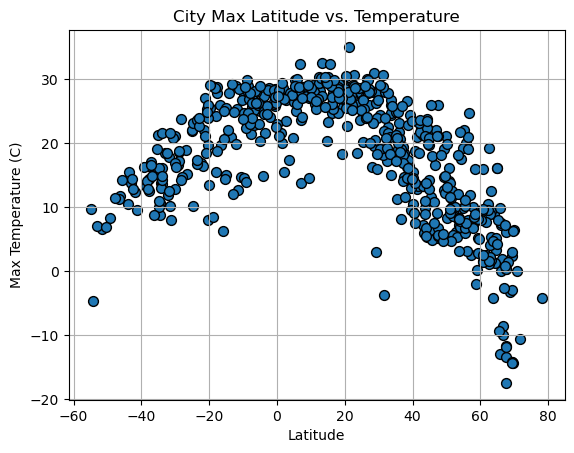

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis,s= 50,  edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

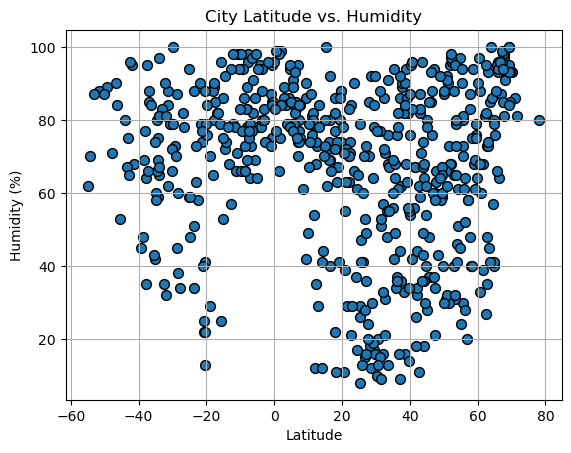

In [9]:
# Build the scatter plots for latitude vs. humidity
X = city_data_df["Lat"]
Y = city_data_df["Humidity"]
plt.scatter(X, Y, s = 50, edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

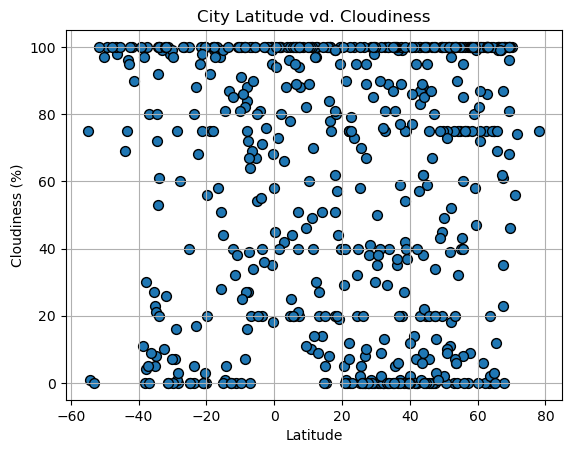

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x= city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y , s= 50, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vd. Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

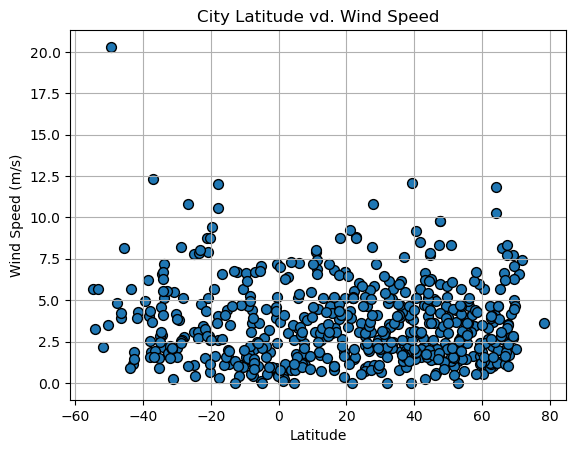

In [11]:
# Build the scatter plots for latitude vs. wind speed
X_axis = city_data_df["Lat"]
Y_axis = city_data_df["Wind Speed"]
plt.scatter(X_axis, Y_axis, s =50, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vd. Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots 
def linear_regression(x_values, y_values, x_pos, y_pos):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
    regress_values  = x_values *slope + intercept
    line_eq = "Y = " +  str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(x_pos, y_pos), fontsize = 15, color ="red")
    print(f"The r value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,0.08,86,56,6.57,SJ,1683852474
3,stanley,54.8680,-1.6985,9.84,97,75,3.60,GB,1683852476
5,vilyuchinsk,52.9306,158.4028,6.15,88,100,1.30,RU,1683852478
7,bandarbeyla,9.4942,50.8122,27.06,86,82,5.50,SO,1683852479
13,mount pearl,47.5166,-52.7813,5.19,59,20,9.77,CA,1683852485


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ingeniero jacobacci,-41.3427,-69.5448,9.62,68,90,4.27,AR,1683852475
2,luderitz,-26.6481,15.1594,15.14,78,100,10.80,NaN,1683852476
4,salinopolis,-0.6136,-47.3561,25.78,85,35,2.39,BR,1683852194
6,grytviken,-54.2811,-36.5092,-4.58,70,1,3.25,GS,1683852479
8,adamstown,-25.0660,-130.1015,21.93,59,100,7.77,PN,1683852481


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8136436200974295


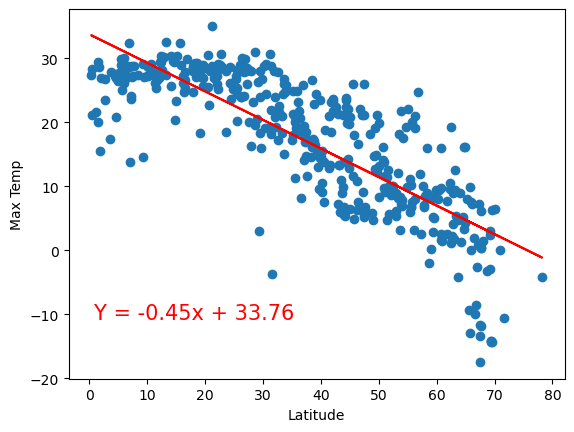

In [15]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0.8, -10.8)


The r value is: 0.7455041241930928


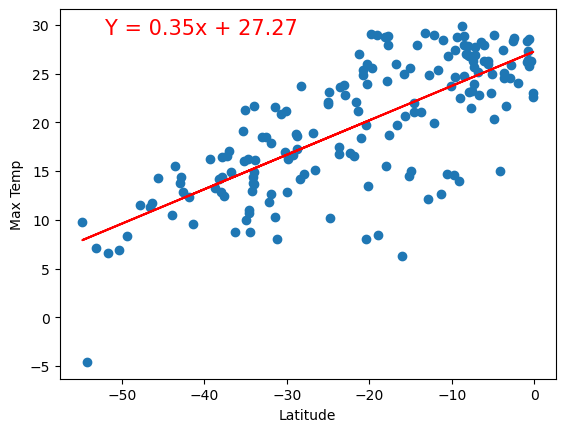

In [16]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -52, 29)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.05897644581213968


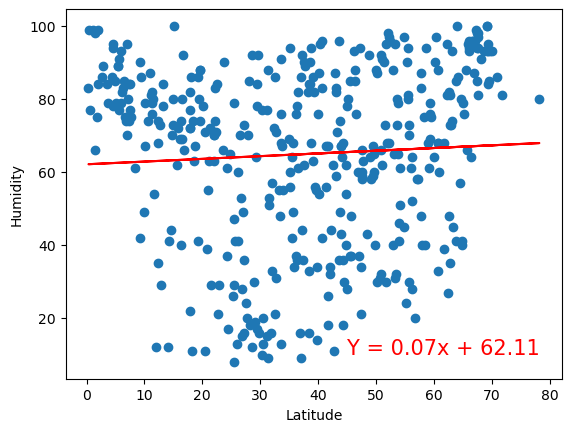

In [17]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],45, 10)

The r value is: 0.21810591120789827


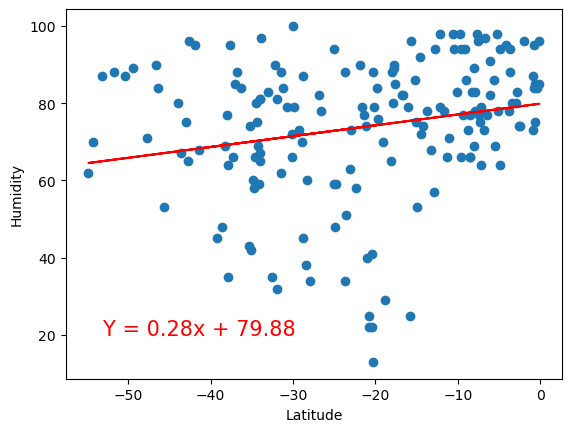

In [18]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],-53, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.0657707992334881


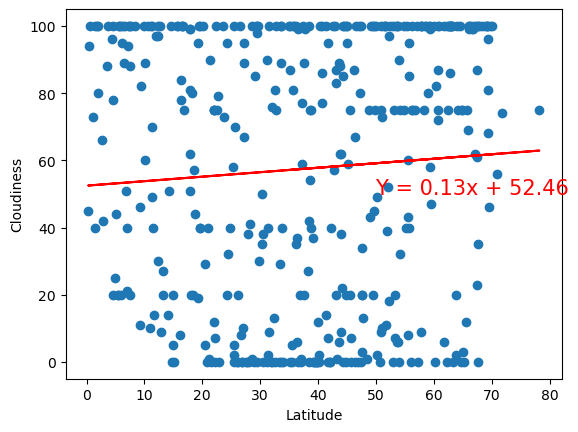

In [19]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 50, 50)

The r value is: 0.03574421357063349


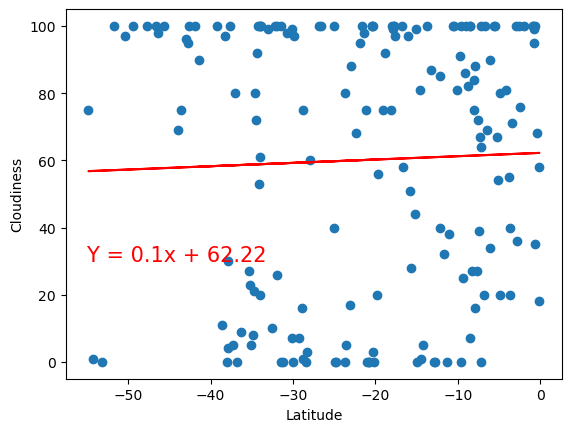

In [20]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -55 , 30 )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.022973033508102727


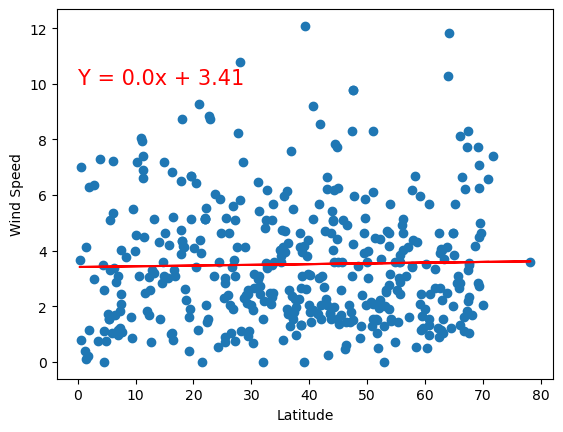

In [21]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0 ,10)
 

The r value is: -0.22256340702421723


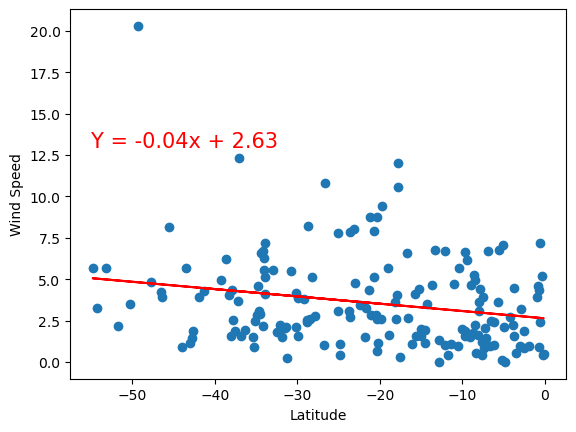

In [22]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -55, 13 )

**Discussion about the linear relationship:** YOUR RESPONSE HERE